In [3]:
# -------------------------------
# 1️⃣ Import libraries
# -------------------------------
import pandas as pd
import numpy as np
import sqlite3

# -------------------------------
# 2️⃣ Create dataset
# -------------------------------
np.random.seed(42)
data_size = 500

data = {
    "OrderID": range(1001, 1001 + data_size),
    "OrderDate": pd.date_range(start="2023-01-01", periods=data_size, freq="D"),
    "CustomerID": np.random.randint(2000, 2100, data_size),
    "Product": np.random.choice(
        ["Laptop", "Tablet", "Mobile", "Monitor", "Printer"], data_size
    ),
    "Category": np.random.choice(
        ["Electronics", "Office Equipment"], data_size
    ),
    "Quantity": np.random.randint(1, 6, data_size),
    "UnitPrice": np.random.randint(100, 1500, data_size),
    "Region": np.random.choice(
        ["Cairo", "Giza", "Alexandria", "Delta"], data_size
    ),
    "SalesRep": np.random.choice(
        ["Ahmed", "Sara", "Omar", "Mona"], data_size
    )
}

df = pd.DataFrame(data)

# -------------------------------
# 3️⃣ Clean & transform
# -------------------------------
df["OrderDate"] = pd.to_datetime(df["OrderDate"])
df["TotalAmount"] = df["Quantity"] * df["UnitPrice"]
df["month"] = df["OrderDate"].dt.strftime("%Y-%m")  # string format for SQL

# Standardize column names
df.columns = df.columns.str.lower()

# -------------------------------
# 4️⃣ Save CSV
# -------------------------------
df.to_csv("cleaned_data.csv", index=False)
print("✅ cleaned_data.csv saved!")

# -------------------------------
# 5️⃣ Create SQLite database
# -------------------------------
conn = sqlite3.connect("sales.db")
df.to_sql("sales", conn, if_exists="replace", index=False)
print("✅ sales.db SQLite database created!")

# -------------------------------
# 6️⃣ Check data
# -------------------------------
df.head()


✅ cleaned_data.csv saved!
✅ sales.db SQLite database created!


,orderid,orderdate,customerid,product,category,quantity,unitprice,region,salesrep,totalamount,month
0,1001,2023-01-01,2051,Monitor,Electronics,5,1046,Alexandria,Omar,5230,2023-01
1,1002,2023-01-02,2092,Tablet,Electronics,4,707,Alexandria,Omar,2828,2023-01
2,1003,2023-01-03,2014,Mobile,Electronics,3,519,Alexandria,Sara,1557,2023-01
3,1004,2023-01-04,2071,Printer,Office Equipment,2,1373,Cairo,Omar,2746,2023-01
4,1005,2023-01-05,2060,Laptop,Office Equipment,5,1240,Alexandria,Sara,6200,2023-01


In [4]:
import sqlite3
import pandas as pd

# Connect to database
conn = sqlite3.connect("sales.db")


In [5]:
query = "SELECT SUM(totalamount) AS total_revenue FROM sales;"
total_revenue = pd.read_sql_query(query, conn)
total_revenue


,total_revenue
0,1250914


In [6]:
query = """
SELECT region, SUM(totalamount) AS revenue
FROM sales
GROUP BY region
ORDER BY revenue DESC;
"""
region_revenue = pd.read_sql_query(query, conn)
region_revenue


,region,revenue
0,Giza,346582
1,Delta,312672
2,Cairo,297352
3,Alexandria,294308


In [7]:
query = """
SELECT product, SUM(totalamount) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
LIMIT 5;
"""
top_products = pd.read_sql_query(query, conn)
top_products


,product,revenue
0,Printer,272500
1,Laptop,271738
2,Monitor,255391
3,Tablet,249742
4,Mobile,201543


In [8]:
query = """
SELECT month, SUM(totalamount) AS monthly_sales
FROM sales
GROUP BY month
ORDER BY month;
"""
monthly_sales = pd.read_sql_query(query, conn)
monthly_sales


,month,monthly_sales
0,2023-01,83144
1,2023-02,54257
2,2023-03,80457
3,2023-04,86747
4,2023-05,77700
5,2023-06,105003
6,2023-07,70347
7,2023-08,74849
8,2023-09,70550
9,2023-10,88198


In [9]:
query = """
SELECT salesrep, SUM(totalamount) AS revenue
FROM sales
GROUP BY salesrep
ORDER BY revenue DESC;
"""
rep_revenue = pd.read_sql_query(query, conn)
rep_revenue


,salesrep,revenue
0,Sara,331407
1,Mona,319920
2,Omar,310904
3,Ahmed,288683


In [10]:
import os

# إنشاء مجلد sql لو مش موجود
os.makedirs("sql", exist_ok=True)


In [11]:
queries = """
-- Total Revenue
SELECT SUM(totalamount) AS total_revenue FROM sales;

-- Revenue by Region
SELECT region, SUM(totalamount) AS revenue
FROM sales
GROUP BY region
ORDER BY revenue DESC;

-- Top 5 Products
SELECT product, SUM(totalamount) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
LIMIT 5;

-- Monthly Sales Trend
SELECT month, SUM(totalamount) AS monthly_sales
FROM sales
GROUP BY month
ORDER BY month;

-- Revenue by SalesRep
SELECT salesrep, SUM(totalamount) AS revenue
FROM sales
GROUP BY salesrep
ORDER BY revenue DESC;
"""

with open("sql/analysis_queries.sql", "w") as f:
    f.write(queries)


In [ ]:
from google.colab import files

files.download("sql/analysis_queries.sql")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


/tmp/ipython-input-4158716600.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x="category", y="totalamount", palette="viridis")


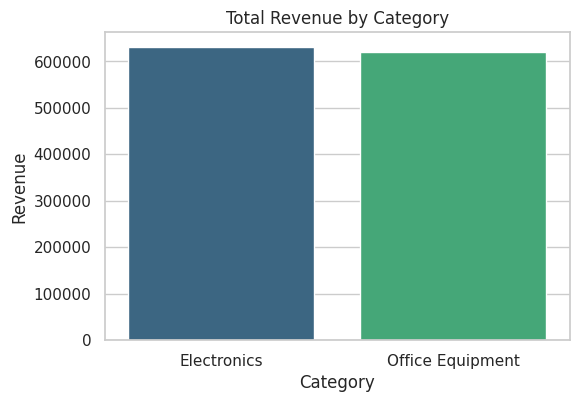

In [13]:
category_sales = df.groupby("category")["totalamount"].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=category_sales, x="category", y="totalamount", palette="viridis")
plt.title("Total Revenue by Category")
plt.ylabel("Revenue")
plt.xlabel("Category")
plt.show()


/tmp/ipython-input-3833244948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x="region", y="totalamount", palette="magma")


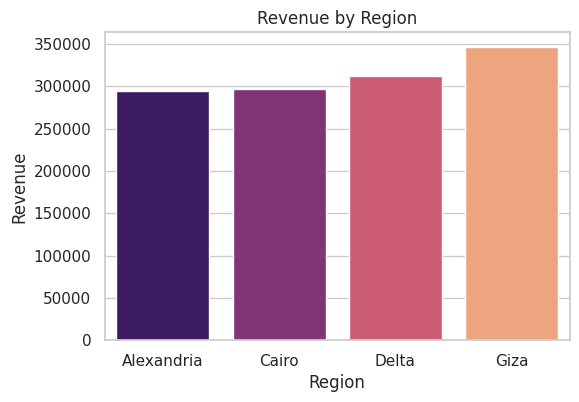

In [14]:
region_sales = df.groupby("region")["totalamount"].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=region_sales, x="region", y="totalamount", palette="magma")
plt.title("Revenue by Region")
plt.ylabel("Revenue")
plt.xlabel("Region")
plt.show()


/tmp/ipython-input-218544031.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="coolwarm")


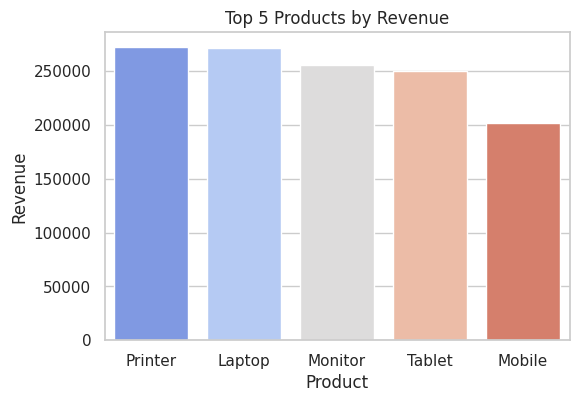

In [15]:
top_products = df.groupby("product")["totalamount"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(6,4))
sns.barplot(x=top_products.index, y=top_products.values, palette="coolwarm")
plt.title("Top 5 Products by Revenue")
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.show()


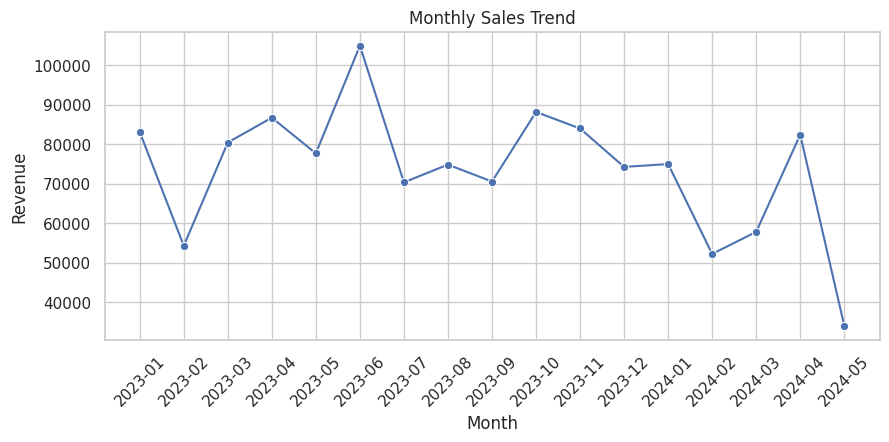

In [16]:
monthly_sales = df.groupby("month")["totalamount"].sum().reset_index()

plt.figure(figsize=(10,4))
sns.lineplot(data=monthly_sales, x="month", y="totalamount", marker="o")
plt.title("Monthly Sales Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-1222854082.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rep_sales, x="salesrep", y="totalamount", palette="Set2")


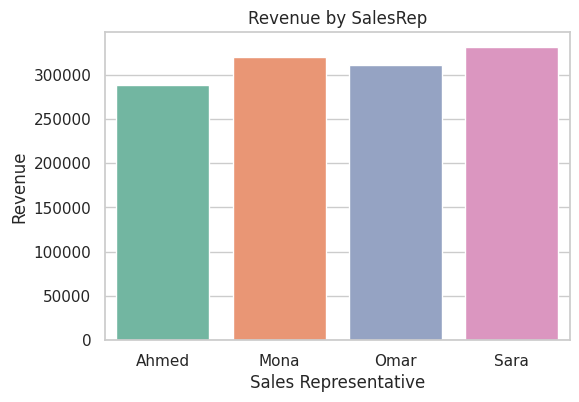

In [17]:
rep_sales = df.groupby("salesrep")["totalamount"].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=rep_sales, x="salesrep", y="totalamount", palette="Set2")
plt.title("Revenue by SalesRep")
plt.ylabel("Revenue")
plt.xlabel("Sales Representative")
plt.show()
